In [ ]:
#On  va reprendre l'exemple du Golois

import gym
import numpy as np
env = gym.make('MountainCar-v0')
import matplotlib.pyplot as plt
## evaluate a random (uniform) policy
lr=[]#liste des récompenses
ll=[]#liste des steps 
for i in range(100):#on lance 100 épisodes 
  env.reset()
  done=False
  rt=0#reward
  el=0#combien de mouvement, de steps?
  while not done:
    s,r,done,_ = env.step(env.action_space.sample())#r=-1 tant qu'on a pas touché le but 
    print(s,r)
    rt +=r#r=reward at this step, rt:accumulated reward 
    el +=1
  lr.append(rt)
  ll.append(el)
print('average length of episodes %.2f (%.2f)'%(np.mean(ll), np.std(ll)))#pour calculer les moyennes 
print('average rewards of episodes %.2f (%.2f)'%(np.mean(lr), np.std(lr)))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[-0.58312277  0.00346393] -1.0
[-0.58021478  0.00290799] -1.0
[-0.5778842   0.00233057] -1.0
[-0.57414829  0.00373592] -1.0
[-0.5690347   0.00511359] -1.0
[-0.5645814  0.0044533] -1.0
[-0.5598215  0.0047599] -1.0
[-0.55379047  0.00603103] -1.0
[-0.5465333   0.00725716] -1.0
[-0.54010427  0.00642904] -1.0
[-0.53455149  0.00555278] -1.0
[-0.52791659  0.00663491] -1.0
[-0.5202493   0.00766729] -1.0
[-0.51160713  0.00864217] -1.0
[-0.50305488  0.00855225] -1.0
[-0.49465661  0.00839827] -1.0
[-0.48647513  0.00818148] -1.0
[-0.47757151  0.00890362] -1.0
[-0.468012    0.00955951] -1.0
[-0.45786745  0.01014454] -1.0
[-0.4492127   0.00865475] -1.0
[-0.44111123  0.00810147] -1.0
[-0.43362213  0.00748911] -1.0
[-0.42779968  0.00582245] -1.0
[-0.42368587  0.00411381] -1.0
[-0.42131024  0.00237563] -1.0
[-0.42068979  0.00062045] -1.0
[-0.42182896 -0.00113917] -1.0
[-0.42271959 -0.00089064] -1.0
[-0.42535533 -0.00263573] -

In [ ]:
# • domains: list of domains of the attributes
#   ex: [[-1,1],[0,5]] two attributes: first has values in [-1,1], the second in [0,5]
#Omar: first for abscisse and second for velocity

# • nbBins: the number of bins of each tiling (here we assume the same number...)
# • nbTiling: the number of tilings used (overlays of tilings)
# • offsets: the offset of each tiling
#   ex: [[0,0], [0.2, 0.4]] example for two attribute: no offset for the first tiling, second is offset by (0.2, 0.4)

def genTilings(domains, nbBins, nbTilings, offsets):
  tilings = []
  for i in range(nbTilings):#here 2
    t = []
    #for each attribute
    for a in range(len(domains)):#we have 2 domains as well
      t.append(genTiling(domains[a], nbBins, offsets[i][a]))
    tilings.append(t)
    #print("tilings=",tilings)
  return tilings

# generate one tiling
def genTiling(domain, nbBins, offset):
  return np.linspace(start=domain[0], stop=domain[1], num=nbBins, endpoint=True)+offset

# Given the observation, provides the tiles that are active
def encode(observation, tilings):
  code=[]
  # for each tiling
  for i in range(len(tilings)):
    c=[];
    # for each attribute #vitesse- position
    for j in range(len(observation)):
      val = np.digitize(observation[j],tilings[i][j])#np.digitize returns the number of the bins to which the value belongs to 
      c.append(val)
    code.append(c)
    #print("Code =",code)
  return code

domaine des positions:  [-1.2, 0.6]
domaine des vitesses:   [-0.07, 0.07]
tiling  0 : 
-1.12 -0.86 -0.60 -0.34 -0.09 0.17 0.43 0.68 
-0.07 -0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 
tiling  1 : 
-1.03 -0.77 -0.52 -0.26 -0.00 0.25 0.51 0.77 
-0.07 -0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 
tiling  2 : 
-1.17 -0.91 -0.66 -0.40 -0.14 0.11 0.37 0.63 
-0.06 -0.04 -0.02 -0.00 0.02 0.04 0.06 0.08 
tiling  3 : 
-1.09 -0.83 -0.57 -0.32 -0.06 0.20 0.46 0.71 
-0.06 -0.04 -0.02 -0.00 0.02 0.04 0.06 0.08 
tiling  4 : 
-1.00 -0.75 -0.49 -0.23 0.03 0.28 0.54 0.80 
-0.06 -0.04 -0.02 0.00 0.02 0.04 0.06 0.08 
tiling  5 : 
-1.14 -0.89 -0.63 -0.37 -0.12 0.14 0.40 0.66 
-0.06 -0.04 -0.02 0.00 0.02 0.04 0.06 0.08 
tiling  6 : 
-1.06 -0.80 -0.55 -0.29 -0.03 0.23 0.48 0.74 
-0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 0.09 
tiling  7 : 
-1.20 -0.94 -0.69 -0.43 -0.17 0.09 0.34 0.60 
-0.07 -0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 


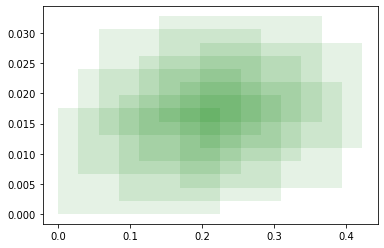

In [ ]:
box = env.observation_space
xmax = box.high[0]
vmax = box.high[1]
xmin = box.low[0]
vmin = box.low[1]
domainX = [xmin, xmax]
domainY = [vmin, vmax]
print("domaine des positions: ", domainX)
print("domaine des vitesses:  ", domainY)
#tilings
nbBins = 8
offsets=[]
x=0
y=0
dx=(xmax-xmin)/(nbBins)**2
dy=(vmax-vmin)/(nbBins)**2
for t in range(nbBins):
  x = (x+3)%nbBins
  y = (y+1)%nbBins
  offsets.append([x*dx,y*dy])
tilings = genTilings([domainX,domainY], 8, 8, offsets)
for i in range(nbBins):
  print("tiling ", i , ": ")
  for j in range(nbBins):
    print('%.2f '% tilings[i][0][j],end='')
  print()
  for j in range(nbBins):
    print('%.2f ' % tilings[i][1][j],end='')
  print()

Dx=(xmax-xmin)/nbBins
Dy=(vmax-vmin)/nbBins
for i in range(nbBins):
  #plt.fill(X,Y,color="grey")
  #chaque surface rectangulaire grise correspond à un appel de fill
  #on peut considérer ce plot comme un zoom sur la première portion des tuiles
  plt.fill([offsets[i][0], offsets[i][0]+Dx, offsets[i][0]+Dx, offsets[i][0], offsets[i][0]], [offsets[i][1], offsets[i][1], offsets[i][1]+Dy, offsets[i][1]+Dy,offsets[i][1]],'green',alpha=0.1)


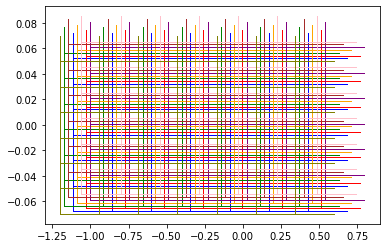

In [ ]:
# assumes D only
def plot2DTiling(t, color):
  n = len(t[0])-1
  for i in range(n):
    x=[t[0][i],t[0][i]]
    y=[t[1][0],t[1][n]]
    plt.plot(x,y,c=color,linewidth=1)
    x=[t[0][0],t[0][n]]
    y=[t[1][i],t[1][i]]
    plt.plot(x,y,c=color,linewidth=1)
    
def plot2DTilings(tilings):
  lc = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'olive','cyan']
  for i in range(len(tilings)):
    plot2DTiling(tilings[i], lc[i])
    
plot2DTilings(tilings)
    


In [ ]:
def epsGreedy(tilings, w, state, epsilon):
  nbActions = env.action_space.n
  if np.random.rand() < epsilon:
    # explore
    return np.random.randint(0,high=nbActions)
  else:
    #exploit
    #compute the Q values for each action
    nbTilings = len(tilings)
    q=[]
    for a in range(nbActions):#on itére sur nbActions
      val = 0
      for t in range(nbTilings):#ensuite sur le nombre de tilings
          val += w[t][state[t][0],state[t][1],a]#w représente les poids w
          #on somme toutes les récompense pour un épisode
      q.append(val)
    return np.argmax(q)#on renvoie l'indice de l'action correspondant au maximum de la valeur

In [ ]:
def Memory_filling(tilings,nbr_episodes,alpha,epsilon,gamma):
v  D=[]#la mémoire
  nbActions = env.action_space.n
  nbTilings = len(tilings)
  nbAttributes = len(tilings[0])
  nbBins = len(tilings[0][0])
  numActions = env.action_space
  print('space with ', nbAttributes, ' attributes and ', nbActions, ' actions')
  print('encoded with ', nbTilings, ' tilings with ', nbBins, ' each')
  episodeLength=[]
  episodeReward=[]
  D=[]#Memory
  # initialise Q tables
  w=[]
  for i in range(nbTilings):
    w.append(np.zeros((nbBins, nbBins, nbActions)))

  #let's learn
  for it in range(nbr_episodes):#Répéter éternellement pour chaque épisode
    obs = env.reset()
    s1 = encode(obs, tilings)
    a1 = epsGreedy(tilings, w, s1, epsilon)#on choisit une action avec epsilon-greedy
    done=False
    rt=0
    el=0
    while (not done):#Répète pour chaque étape de l'épisode
      obs, r, done, info = env.step(a1)
      s2 = encode(obs, tilings)
      a2 = epsGreedy(tilings, w, s2, epsilon)
      # q updates
      q1 = 0
      q2 = 0
      # compute estimates Q(s1,a1) and Q(s2,a2)
      # q(s,a) = sum the weights of the active cells.
      for t in range(nbTilings):
        q1 += w[t][s1[t][0],s1[t][1],a1]#a1 est l'ancienne action
        q2 += w[t][s2[t][0],s2[t][1],a2]#a2 est la nouvelle action
      # weight update
      for t in range(nbTilings):
        w[t][s1[t][0],s1[t][1],a1] = w[t][s1[t][0],s1[t][1],a1] + alpha*(r + gamma * q2 - q1)#q2 is equivalent to v and q1 to v chapeau
      # update states and actions
      s1_temp=s1
      a1_temp=a1
      s1 = s2
      a1 = a2#la nouvelle action devient l'ancienne 
      el += 1
      rt += r
      transition=[np.array(s1_temp),a1_temp,rt,np.array(s2)]
      D.append(np.array(transition))
      #indice = np.random.choice(len(D), 1, replace=False)
      #print(indice)
      #idx=np.random.randint(len(D),size=1)#select random index from  0 to 10
      #print(type(D))
      #print(type(int(indice[0])))
      #transition_aleatoire=D[int(indice[0]),:]
    episodeLength.append(el)
    episodeReward.append(rt)
  return w, episodeLength, episodeReward,np.array(D)


In [ ]:
w,episodeLength,episodeReward,my_memory=Memory_filling(tilings,2000,0.01,0.1,0.99)


space with  2  attributes and  3  actions
encoded with  8  tilings with  8  each


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
print(my_memory.shape)
print(my_memory[0,:])


(20000, 4)
[array([[3, 4],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [4, 4]])
 0 -1.0
 array([[3, 4],
       [3, 4],
       [3, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [3, 3],
       [4, 4]])]


In [ ]:
def pick_random_transition(memoryD,batch_size):
  indice = np.random.choice(len(memoryD), batch_size, replace=False) 
  transition_aleatoire=[]
  print(len(indice))
  for idx in range(len(indice)):
    transition_aleatoire.append(memoryD[indice[idx]])
  return np.array(transition_aleatoire)
D=pick_random_transition(my_memory,1)
print(len(D))

1
1


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras import regularizers

nb_actions = env.action_space.n
N = 2000 #nombre de samples (d'exemples do nc d'épisodes ??)
epochs = 70
batch = 180
#*****
alpha=
epsilon=
gamma=

def NN_qlearning():
  input_data =np.array()
  input_data = input_data.astype ('float32')
  print(input_data.shape)#added
  policy = np.random.randint(moves, size=(N,))#choisi une politique aléatoire entre 1 et 361
  print(policy.shape)
  policy = keras.utils.to_categorical (policy)
  value = np.random.randint(2, size=(N,))
  value = value.astype ('float32')
  print(value.shape)
  data=Memory_filling(tilings,2000,0.01,0.1,0.99)
def Memory_filling(tilings,nbr_episodes,alpha,epsilon,gamma):



SyntaxError: ignored

In [ ]:






input_data =np.array()



input_data = input_data.astype ('float32')
print(input_data.shape)#added
policy = np.random.randint(moves, size=(N,))#choisi une politique aléatoire entre 1 et 361
print(policy.shape)
policy = keras.utils.to_categorical (policy)
value = np.random.randint(2, size=(N,))
value = value.astype ('float32')
print(value.shape)

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)#récupèr 10000 exemples qui n'ont pas été appris et donnés pâr le getBatch, récupèure les entrées et sortie dans la validation , c'est pour savoir si le modèle a bien appris ou pas


input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)# on fait une convolution avec filtre 1 juste  pour  transformer le nombre de plan pour  obtenir 64 plans 
for i in range (6):#pour model résiduel
    x1 = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
    x1 = layers.Conv2D(filters, 3, activation='swish',padding='same')(x1)
    x = layers.add([x1,x])#x is the input
    x1 = layers.Conv2D(filters, 3, activation='tanh',padding='same')(x)

    #x1 = layers.Conv2D(filters, 3, activation='relu',padding='same')(x1)
    #x1 = layers.Conv2D(filters, 1, activation='relu')(x1)
    x = layers.add([x1,x])#x is the input
    x = layers.ReLU()(x)
    x=layers.Dropout(0.06)(x)
    x = layers.BatchNormalization()(x)
policy_head = layers.Conv2D(1, 1, activation='swish', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
policy_head = layers.Conv2D(filters, 3, activation='swish', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(policy_head)
policy_head = layers.Conv2D(1, 3, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(policy_head)

#policy_head = layers.Dense(60,activation='relu')(policy_head)

#policy_head = layers.Conv2D(1, 3, activation='swish', padding='same')(policy_head)
#policy_head = layers.Conv2D(16, 3, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(policy_head)
#policy_head = layers.Conv2D(8, 3, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(policy_head)

policy_head = layers.Flatten()(policy_head)
policy_head = layers.Activation('softmax', name='policy')(policy_head)
#on est entrain d'effectuer un apprentissage sur 2 niveaux: au niveau de la policy(laquelle)+de la valeur(lequel va gagner)
value_head = layers.Conv2D(80, 3, activation='swish', padding='same')(x)
value_head=layers.Dropout(0.20)(value_head)
value_head = layers.GlobalAveragePooling2D()(value_head)
value_head = layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
#value_head = layers.Dense(50, activation='mish', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head=layers.Dropout(0.10)(value_head)
value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0008))(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])

model.summary ()

model.compile(optimizer=keras.optimizers.SGD(lr=0.014, momentum=0.95),
              loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
              loss_weights={'policy' : 1.0, 'value' : 1.0},
              metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

for i in range (1, epochs + 1):
    print ('epoch ' + str (i))
    golois.getBatch (input_data, policy, value, end, groups)#une partie jouée par catago , remplit les tenseurs avec tenseurs
    history = model.fit(input_data,
                        {'policy': policy, 'value': value}, 
                        epochs=1, batch_size=batch)
    if (i % 10 == 0):
        golois.getValidation (input_data, policy, value, end)
        val = model.evaluate (input_data,
                              [policy, value], verbose = 0, batch_size=batch)#mse sur les données de validations (su rles données qui n'ont jamais été)
        print ("val =", val)

model.save ('test.h5')